In [1]:
# importing pandas and matplotlib librbaries 
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams
%matplotlib inline


In [2]:
# Loading the csv file into Panda's dataframe
df=pd.read_csv("vgsales.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
# Chcking the number of rows & columns in the dataframe
df.shape


(16598, 11)

In [4]:
# Cheking to see columns in the dataframe
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [27]:
# Converting Rank and Year from int and flaot to Strings to avoid aggrgation errors
df[["Rank", "Year"]]=df[["Rank","Year"]].astype(str)

# Checking to see the number of NaN in the dataframe
df.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [37]:
# Chenking the value count for Publisher column, including NaN 
df["Publisher"].value_counts(dropna= False).head(50)


Electronic Arts                           1351
Activision                                 975
Namco Bandai Games                         932
Ubisoft                                    921
Konami Digital Entertainment               832
THQ                                        715
Nintendo                                   703
Sony Computer Entertainment                683
Sega                                       639
Take-Two Interactive                       413
Capcom                                     381
Atari                                      363
Tecmo Koei                                 338
Square Enix                                233
Warner Bros. Interactive Entertainment     232
Disney Interactive Studios                 218
Unknown                                    203
Midway Games                               198
Eidos Interactive                          198
505 Games                                  192
Microsoft Game Studios                     189
D3Publisher  

In [55]:
# Filling NaN cells with "Various" in the Publisher field and rechking NaN totals
df["Publisher"].fillna(value= "Various", inplace=True)
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [133]:
# Top 10 Genre by Global Sales in the gaming industry
df.groupby(["Genre"]).sum().sort_values("Global_Sales",ascending=False)



,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,877.83,525.00,159.95,187.38,1751.18
Sports,683.35,376.85,135.37,134.97,1330.93
Shooter,582.60,313.27,38.28,102.69,1037.37
Role-Playing,327.28,188.06,352.31,59.61,927.37
Platform,447.05,201.63,130.77,51.59,831.37
Misc,410.24,215.98,107.76,75.32,809.96
Racing,359.42,238.39,56.69,77.27,732.04
Fighting,223.59,101.32,87.35,36.68,448.91
Simulation,183.31,113.38,63.70,31.52,392.20


Text(0, 0.5, 'Video Games Sales in Million USD')

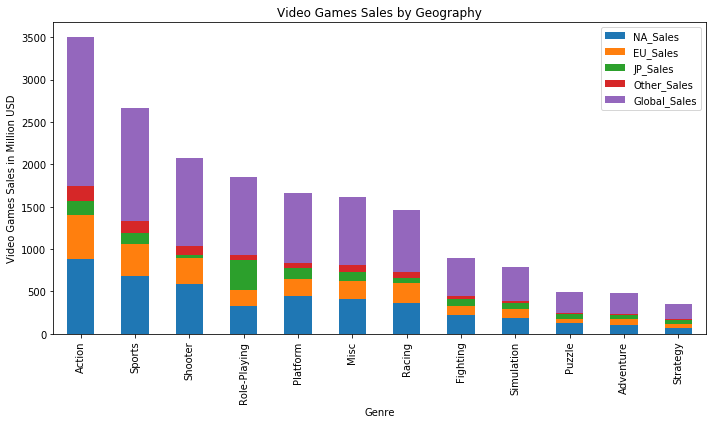

In [144]:
df.groupby(["Genre"]).sum().sort_values("Global_Sales",ascending=False).plot(kind='bar',figsize =(10,6), stacked=True,title='Video Games Sales by Geography')
plt.ylabel("Video Games Sales in Million USD")

In [115]:
# Grouping by Platform and finding the numder of game titles releases for each platform - largest to smallest number
# Creating a new datafram "title_release" by grouping exisiting dataframe and ginding uniqe Game tiles in the Name column
title_release=df.groupby(["Platform"]).agg({"Name": "nunique"}).reset_index().sort_values("Name",ascending=False)  

In [116]:
# Calculating the % for eash Platform by unique game tile name count.
title_release["% of Total Title Release"]= round(title_release["Name"]/title_release["Name"].sum()* 100,2)

title_release.head(10)

,Platform,Name,% of Total Title Release
4,DS,2163,13.04
16,PS2,2161,13.02
17,PS3,1327,8.00
26,Wii,1324,7.98
28,X360,1264,7.62
19,PSP,1213,7.31
15,PS,1196,7.21
13,PC,959,5.78
29,XB,824,4.97
6,GBA,822,4.95


In [117]:
# Grouping dataset by Publishers, and couting unique ttiles name, then sorting them.
title_publisher=df.groupby(["Publisher"]).agg({"Name": "nunique"}).reset_index().sort_values("Name",ascending=False).head(10) 

In [118]:
# Top 10 Game title publishers
title_publisher

,Publisher,Name
347,Namco Bandai Games,776
359,Nintendo,667
275,Konami Digital Entertainment,640
457,Sony Computer Entertainment,622
138,Electronic Arts,606
526,Ubisoft,572
447,Sega,480
21,Activision,417
489,THQ,409
53,Atari,280


In [135]:
# Top 10 Publishers by Global Sales in the gaming industry
# df.groupby(["Publisher"]).Global_Sales.agg(["sum"]).nlargest(10, 'sum').round()

df.groupby(["Publisher"])["Global_Sales"].agg(["sum"]).nlargest(10, 'sum').round().rename(columns={'sum':'Total_Global Sales Million USD'})


,Total_Global Sales Million USD
Publisher,
Nintendo,1787.0
Electronic Arts,1110.0
Activision,727.0
Sony Computer Entertainment,607.0
Ubisoft,475.0
Take-Two Interactive,400.0
THQ,341.0
Konami Digital Entertainment,284.0
Sega,273.0


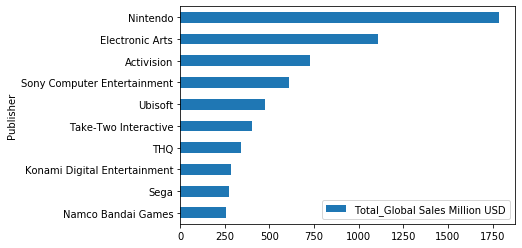

In [70]:
# Plotting a bar chart for the 10 largest Publisher by Global Sales
df.groupby(["Publisher"]).Global_Sales.agg(["sum"]).nlargest(10, 'sum').rename(columns={'sum':'Total_Global Sales Million USD'}).plot(kind="barh").invert_yaxis()

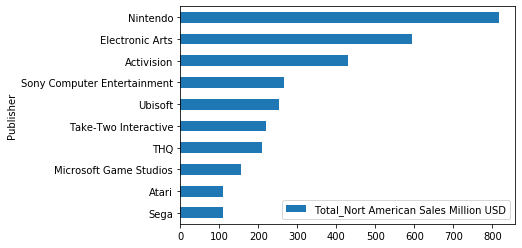

In [72]:
# Finding the 10 largest Publisher by Sales in North America
df.groupby(["Publisher"]).NA_Sales.agg(["sum"]).nlargest(10, 'sum').rename(columns={'sum':'Total_Nort American Sales Million USD'}).plot.barh().invert_yaxis()
# x.plot.barh().invert_yaxis()
# ##.plot(kind="barh")(figsize =(10,5)).invert_yaxis()

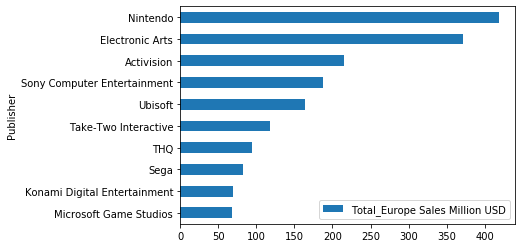

In [67]:
# Finding the 10 largest Publisher by Sales in Europe
df.groupby(["Publisher"]).EU_Sales.agg(["sum"]).nlargest(10, 'sum').rename(columns={'sum':'Total_Europe Sales Million USD'}).plot(kind="barh").invert_yaxis()

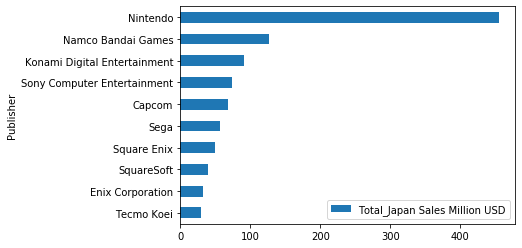

In [68]:
# Finding the 10 largest Publisher by Sales in Japan
df.groupby(["Publisher"]).JP_Sales.agg(["sum"]).nlargest(10, 'sum').rename(columns={'sum':'Total_Japan Sales Million USD'}).plot(kind="barh").invert_yaxis()

Text(0.5, 0, 'Sales in Million USD')

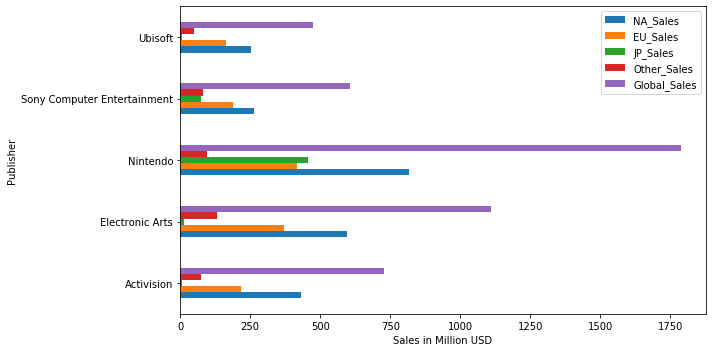

In [94]:
# Fiiltering the 5 largest Publisher by Global Sales, then comparing their sales in NA, Japan, Europe
# Method 1 of filtering top 5 Publishers by revenue
# pfilter=(df["Publisher"]=="Nintendo")|(df["Publisher"]=="Electronic Arts")|(df["Publisher"]=="Activision")|(df["Publisher"]=="Sony Computer Entertainment")
# Method 2 of filtering top 5 Publishers by revenue
publishers=["Nintendo","Electronic Arts","Activision","Sony Computer Entertainment","Ubisoft"]
top_five_publishers=df[df["Publisher"].isin(publishers)]

top_five_publishers.groupby("Publisher").sum().plot.barh(figsize =(10,5))
plt.xlabel("Sales in Million USD")


Text(0.5, 0, 'Global Sales in Million USD')

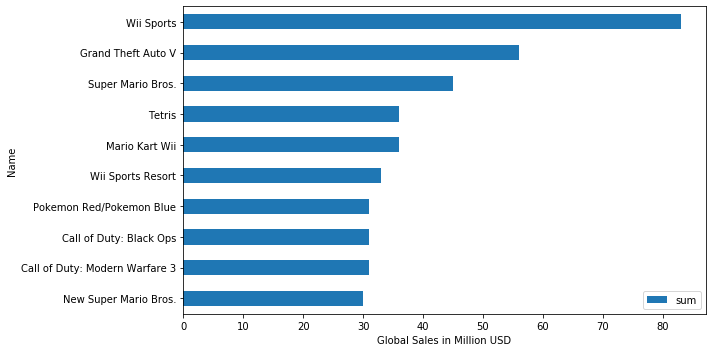

In [207]:
# Top 10 games by Global Sales
df.groupby("Name").Global_Sales.agg(["sum"]).nlargest(10,'sum').round().plot.barh(figsize =(10,5)).invert_yaxis()
plt.xlabel("Global Sales in Million USD")


Text(0.5, 0, 'Sales in Million USD')

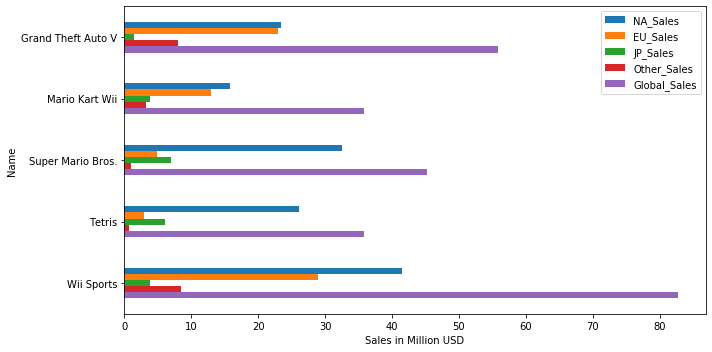

In [79]:
# Creating a filter "games" for top 5 Game titles
games=["Wii Sports","Grand Theft Auto V","Super Mario Bros.","Tetris","Mario Kart Wii"]
# Isolating a subset of the datafram to pull only data realting to top 5 Game titles
top_five_games=df[df["Name"].isin(games)]
# Plotting a bar chart for top 5 games, aggregating their sales by different NA, EU, Japan, Global Sales.
top_five_games.groupby("Name").sum().plot.barh(figsize =(10,5)).invert_yaxis()
plt.xlabel("Sales in Million USD")


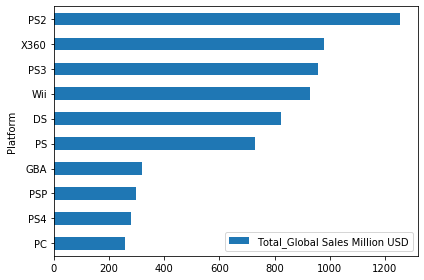

In [80]:
# Top 10 Platforms by Global Sales

df.groupby("Platform").Global_Sales.agg(["sum"]).nlargest(10,'sum').rename(columns={'sum':'Total_Global Sales Million USD'}).plot(kind="barh").invert_yaxis()





In [97]:
# Top 5 Platforms for top 5 Publishers by Global Sales

pds=top_five_publishers.groupby(["Publisher","Platform"]).Global_Sales.agg(["sum"])
pds

sum
Publisher  Platform       
Activision 2600      19.42
           3DS        4.66
           DC         0.10
           DS        42.11
           GB         1.33
...                    ...
Ubisoft    Wii       92.21
           WiiU       5.78
           X360      81.59
           XB        23.36
           XOne      17.91

[74 rows x 1 columns]

Text(0.5, 1.0, "Nintendo's Top five Platforms by Global Sales")

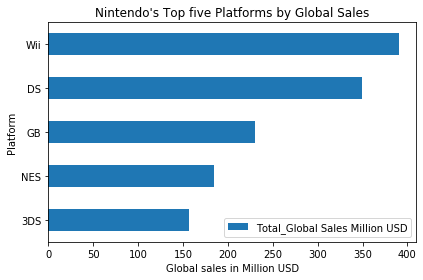

In [109]:
# Top 5 platforms for Nintendo by Global Sales 
pds.loc["Nintendo"].sort_values("sum",ascending=False).head(5).rename(columns={'sum':'Total_Global Sales Million USD'}).plot(kind="barh").invert_yaxis()
plt.xlabel("Global sales in Million USD")
plt.title("Nintendo's Top five Platforms by Global Sales")

Text(0.5, 1.0, "Electronic Arts' Top five Platforms by Global Sales")

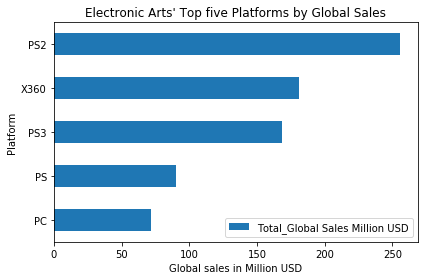

In [110]:
# Top 5 platforms for Electronic Arts by Global Sales 
pds.loc["Electronic Arts"].sort_values("sum",ascending=False).head(5).rename(columns={'sum':'Total_Global Sales Million USD'}).plot(kind="barh").invert_yaxis()
plt.xlabel("Global sales in Million USD")
plt.title("Electronic Arts' Top five Platforms by Global Sales")

Text(0.5, 1.0, "Activision's Top five Platforms by Global Sales")

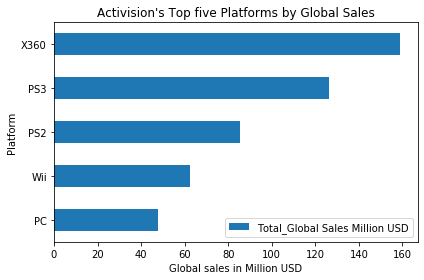

In [111]:
# Top 5 platforms for Activision by Global Sales 
pds.loc["Activision"].sort_values("sum",ascending=False).head(5).rename(columns={'sum':'Total_Global Sales Million USD'}).plot(kind="barh").invert_yaxis()
plt.xlabel("Global sales in Million USD")
plt.title("Activision's Top five Platforms by Global Sales")